In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### 1. Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
from sklearn.datasets import make_moons

In [6]:
# Create the dataset
X, y = make_moons(n_samples=10000,
                  noise=0.05,
                  random_state=42)

In [7]:
# See the shape of X and y
X.shape, y.shape

((10000, 2), (10000,))

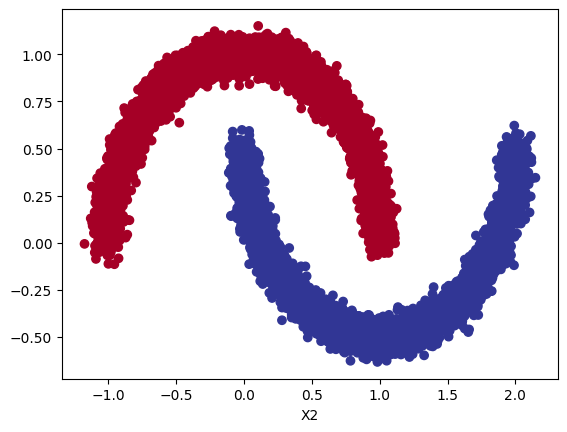

In [11]:
# Visualize it
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("X1")
plt.xlabel('X2')
plt.show()

In [13]:
# Let's split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
X_train.shape, X_test.shape

((8000, 2), (2000, 2))

In [21]:
# Let's build a model

# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 3s 4ms/step - loss: 0.5590 - accuracy: 0.7195 - val_loss: 0.4942 - val_accuracy: 0.8170
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4403 - accuracy: 0.8561 - val_loss: 0.4171 - val_accuracy: 0.8680
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3774 - accuracy: 0.8798 - val_loss: 0.3648 - val_accuracy: 0.8835
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8934 - val_loss: 0.3297 - val_accuracy: 0.8925
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3016 - accuracy: 0.9021 - val_loss: 0.2928 - val_accuracy: 0.9080
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2621 - accuracy: 0.9274 - val_loss: 0.2476 - val_accuracy: 0.9415
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.2142 - accuracy: 0.9584 - val_loss: 0.1957 - val_accuracy: 0.9675
Epoch 

#### 2. Train a model to get 80%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [22]:
from tensorflow.keras.datasets import fashion_mnist # type: ignore

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [23]:
# Let's scale the data
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [26]:
# How many classes has y?
import numpy as np

len(np.unique(train_labels))

10

In [27]:
# Input shape of a sample
train_data[0].shape

(28, 28)

In [30]:
# Let's build a model

tf.random.set_seed(42)

# Create the model
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_fashion.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                      metrics=['accuracy'])

# Fit the model
history_fashion = model_fashion.fit(train_data_norm, train_labels,
                                    epochs=20,
                                    validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0866 - accuracy: 0.6083 - val_loss: 0.9077 - val_accuracy: 0.6709
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8548 - accuracy: 0.6869 - val_loss: 0.8675 - val_accuracy: 0.6946
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7874 - accuracy: 0.7199 - val_loss: 0.7822 - val_accuracy: 0.7234
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7288 - accuracy: 0.7497 - val_loss: 0.7401 - val_accuracy: 0.7400
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6982 - accuracy: 0.7598 - val_loss: 0.7325 - val_accuracy: 0.7516
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6806 - accuracy: 0.7678 - val_loss: 0.7029 - val_accuracy: 0.7648
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6704 - accuracy: 0.7714 - val_loss: 0.6936 - val_accuracy:

In [31]:
# Create a confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [48]:
y_probs = model_fashion.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[2.6913123e-05, 7.9536795e-07, 9.1528648e-07, 6.2027875e-06,
        1.7682074e-06, 1.7784631e-02, 8.3216510e-05, 5.8605194e-02,
        5.6714462e-03, 9.1781890e-01],
       [8.2838867e-04, 9.9271764e-09, 9.4099140e-01, 4.1784698e-04,
        2.8454905e-02, 0.0000000e+00, 2.9307475e-02, 0.0000000e+00,
        8.7773865e-11, 0.0000000e+00],
       [5.4128102e-10, 9.9778926e-01, 6.8814128e-09, 3.1149838e-04,
        1.8992422e-03, 1.0031806e-18, 1.1243159e-09, 0.0000000e+00,
        1.2077486e-08, 0.0000000e+00],
       [1.4210114e-10, 9.9794239e-01, 4.1613908e-09, 1.2615172e-04,
        1.9315227e-03, 7.6704116e-20, 4.3087114e-10, 0.0000000e+00,
        4.7241158e-09, 0.0000000e+00],
       [1.1890233e-01, 3.5490684e-06, 1.6595942e-01, 1.2588981e-02,
        1.1622636e-02, 6.5238374e-18, 6.9063419e-01, 0.0000000e+00,
        2.8888002e-04, 0.0000000e+00]], dtype=float32)

In [51]:
y_preds = tf.argmax(y_probs, axis=1)

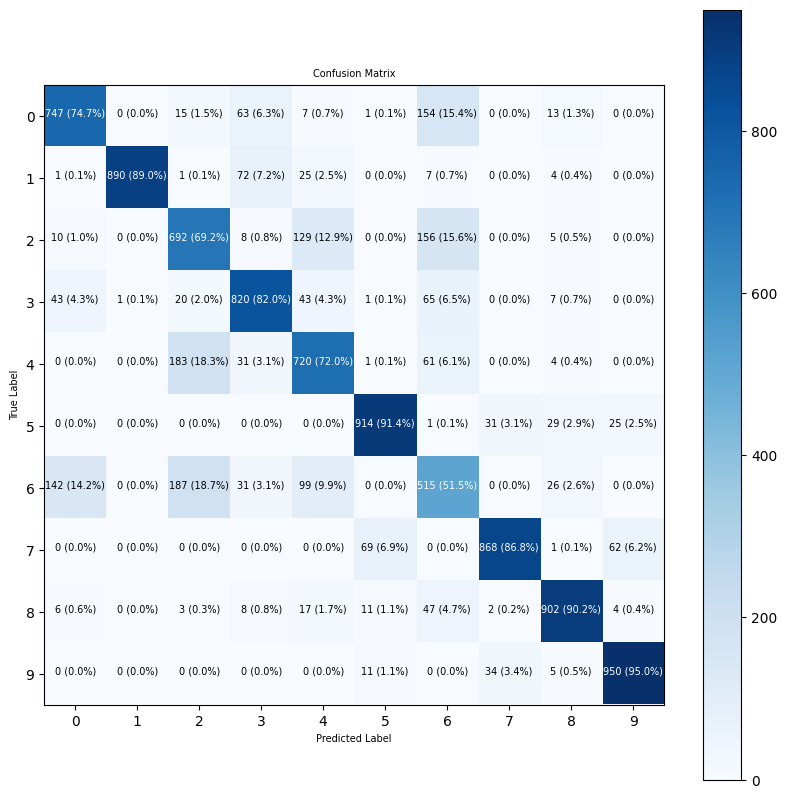

In [53]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      text_size=7)